In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import math
import matplotlib.pyplot as plt

# **Filtro da Média**

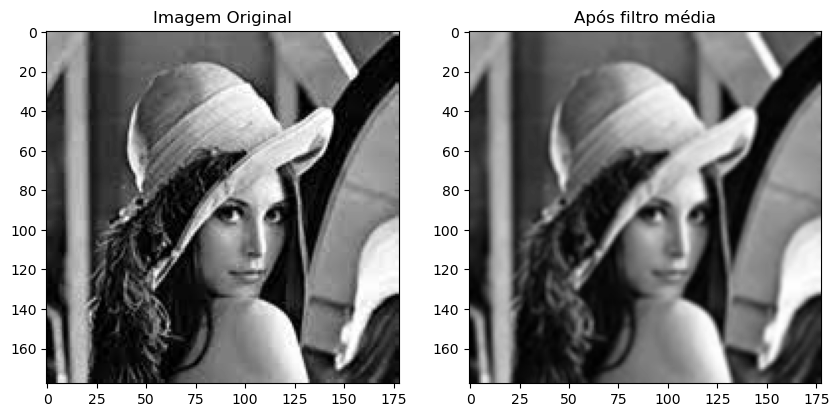

In [26]:
def return_neighborhood_mean(image, x, y):
   
    neighbors = []
    
    # coordenadas dos vizinhos
    x_n = [x-1,   x, x+1, x-1, x,  x+1, x-1,   x, x+1]
    y_n = [y-1, y-1, y-1,   y, y,  y, y+1, y+1, y+1]

    for i in range(9):
        if (x_n[i] >= 0 and y_n[i] >= 0 and x_n[i] < image.shape[0] and y_n[i] < image.shape[1]) or (x_n[i] == x and y_n[i] == y):
            neighbors.append(image[x_n[i], y_n[i]])

    return np.mean(np.array(neighbors))

#Filtro da Média
def filter_mean(image):
    
    new_image = image.copy()
    (x, y) = image.shape

    for i in range(x):
        for j in range(y):
            new_image[i,j] = return_neighborhood_mean(image, i, j)
    
    return new_image


image = cv2.imread("/kaggle/input/imagejpeg/images.jpeg")
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_mean = filter_mean(img_gray)
hist, bins = np.histogram(image.ravel(), 256, [0, 256])
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].imshow(img_gray, cmap='gray')
axis[0].axis('on')
axis[0].set_title('Imagem Original')

axis[1].imshow(image_mean, cmap='gray')
axis[1].axis('on')
axis[1].set_title('Após filtro média')

plt.show()

# Filtro Gaussiano

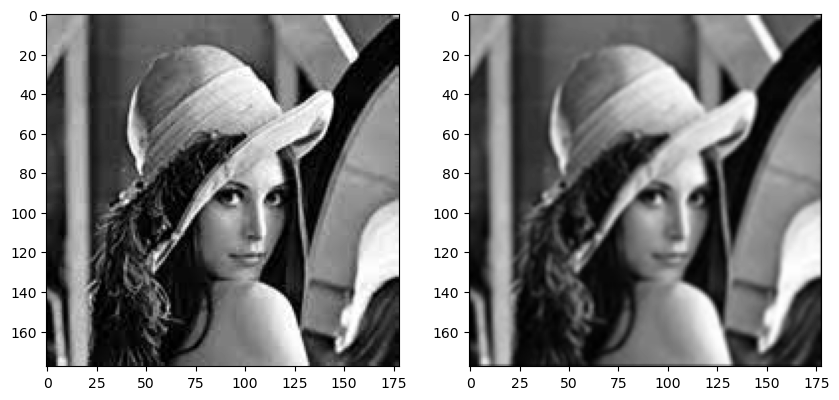

In [27]:
def return_neighborhood(image, x, y):
    neighbors = []
    
    # coordenadas dos vizinhos
    x_n = [x-1,   x, x+1, x-1, x,  x+1, x-1,   x, x+1]
    y_n = [y-1, y-1, y-1,   y, y,  y, y+1, y+1, y+1]

    for i in range(9):
        if (x_n[i] >= 0 and y_n[i] >= 0 and x_n[i] < image.shape[0] and y_n[i] < image.shape[1]) or (x_n[i] == x and y_n[i] == y):
            neighbors.append(image[x_n[i], y_n[i]])
        else:
            neighbors.append(0.0)

    return np.array(neighbors)

def gaussian_kernel(size, sigma):
    center = size // 2
    kernel = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
#             kernel[i, j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))
            kernel[i, j] = (1 / (2 * 3.14 * sigma**2)) * math.exp(-((x**2 + y**2) / (2 * sigma**2)))

    kernel = kernel / np.sum(kernel) # Normalização do kernel
    return kernel

def convolution_image(image, kernel):
    new_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = return_neighborhood(image, i, j).reshape(3,3)
            new_value_pixel = np.sum(neighborhood * kernel)         
            new_value_pixel //= np.sum(kernel)
            new_image[i,j] = new_value_pixel
            
    return new_image



image = cv2.imread("/kaggle/input/imagejpeg/images.jpeg")
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

kernel = gaussian_kernel(3, 2)
image_gaussian = convolution_image(img_gray, kernel)

fig, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].imshow(img_gray, cmap='gray')
axis[0].axis('on')

axis[1].imshow(image_gaussian, cmap='gray')
axis[1].axis('on')

plt.show()

# Filtro Laplaciano

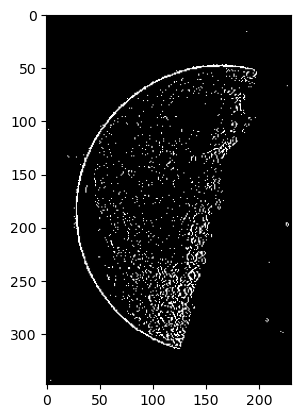

In [56]:
def return_neighborhood(image, x, y):
    neighbors = []
    
    # coordenadas dos vizinhos
    x_n = [x-1,   x, x+1, x-1, x,  x+1, x-1,   x, x+1]
    y_n = [y-1, y-1, y-1,   y, y,  y, y+1, y+1, y+1]

    for i in range(9):
        if (x_n[i] >= 0 and y_n[i] >= 0 and x_n[i] < image.shape[0] and y_n[i] < image.shape[1]) or (x_n[i] == x and y_n[i] == y):
            neighbors.append(image[x_n[i], y_n[i]])
        else:
            neighbors.append(0.0)

    return np.array(neighbors)



def laplaciano_kernel(image):
    new_image = np.zeros_like(image)
    
    kernelN = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    
    for i in range(1, new_image.shape[0] - 1):
        for j in range(1, new_image.shape[1] - 1):
            neighborhood = return_neighborhood(image, i, j).reshape(3,3)
        
            valor = np.sum(neighborhood * kernelN)  * -0.06

            new_image[i,j] = valor
 
    return new_image


image = cv2.imread("/kaggle/input/imagemoon/image_moon.png")
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_gaussian = laplaciano_kernel(img_gray)
plt.imshow(image_gaussian, cmap='gray')
plt.show()

# Filtro Laplace-Gaussiano

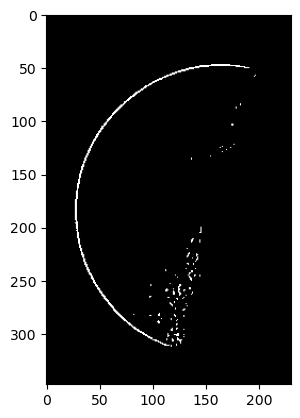

In [57]:
image_gaussian = convolution_image(img_gray, kernel)

image_laplace_gaussian = laplaciano_kernel(image_gaussian)

plt.imshow(image_laplace_gaussian, cmap='gray')
plt.show()

# Filtro Unsharp

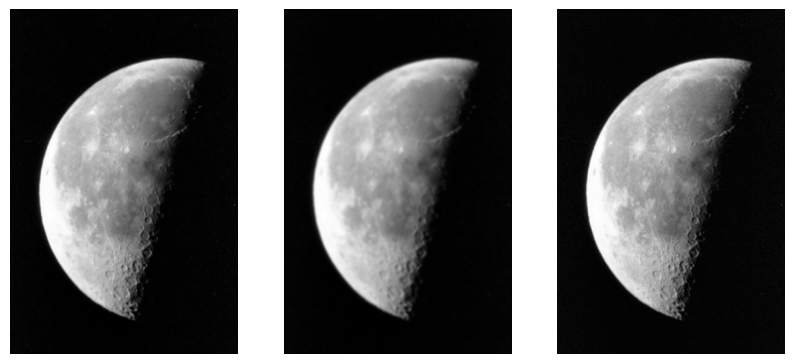

In [63]:
def filter_unshap(image, image_smooth, k):
   
    new_image = np.zeros_like(image)
    s = image + (image - image_smooth) * k 
            
    return s


fig, axs = plt.subplots(1, 3, figsize=(10, 15))

axs[0].imshow(img_gray, cmap='gray')
axs[0].axis('off')

axs[1].imshow(image_gaussian, cmap='gray')
axs[1].axis('off')

axs[2].imshow(filter_unshap(img_gray, image_gaussian, -0.010), cmap='gray')
axs[2].axis('off')


plt.show()

# Filtro Min; Max; Min-Max

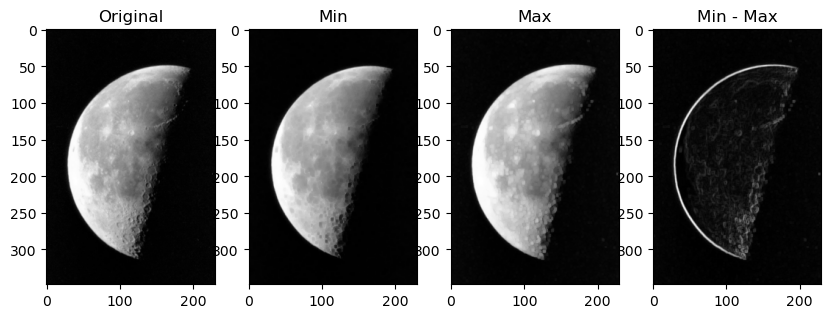

In [64]:
def return_neighborhood(image, x, y):
    neighbors = []

    # coordenadas dos vizinhos
    x_n = [x-1,   x, x+1, x-1, x,  x+1, x-1,   x, x+1]
    y_n = [y-1, y-1, y-1,   y, y,  y, y+1, y+1, y+1]

    for i in range(9):
        if (x_n[i] >= 0 and y_n[i] >= 0 and x_n[i] < image.shape[0] and y_n[i] < image.shape[1]) or (x_n[i] == x and y_n[i] == y):
            neighbors.append(image[x_n[i], y_n[i]])

    return np.array(neighbors)


def filter_minmax(image, filter_="maxmin"):
    new_image = np.zeros_like(image)
    
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            neigh = return_neighborhood(image, i, j)
            min_ = np.min(neigh)
            max_ = np.max(neigh)
            
            if filter_ == "min":
                new_image[i,j] = min_
            elif filter_ == "max":
                new_image[i,j] = max_
            elif filter_ == "maxmin":
                new_image[i,j] = max_ - min_
                
    return new_image


fig, axs = plt.subplots(1,4, figsize=(10, 15))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(filter_minmax(img_gray, "min"), cmap='gray')
axs[1].set_title("Min")
axs[2].imshow(filter_minmax(img_gray, "max"), cmap='gray')
axs[2].set_title("Max")
axs[3].imshow(filter_minmax(img_gray), cmap='gray')
axs[3].set_title("Min - Max")


plt.show()

# Filter Midpoint

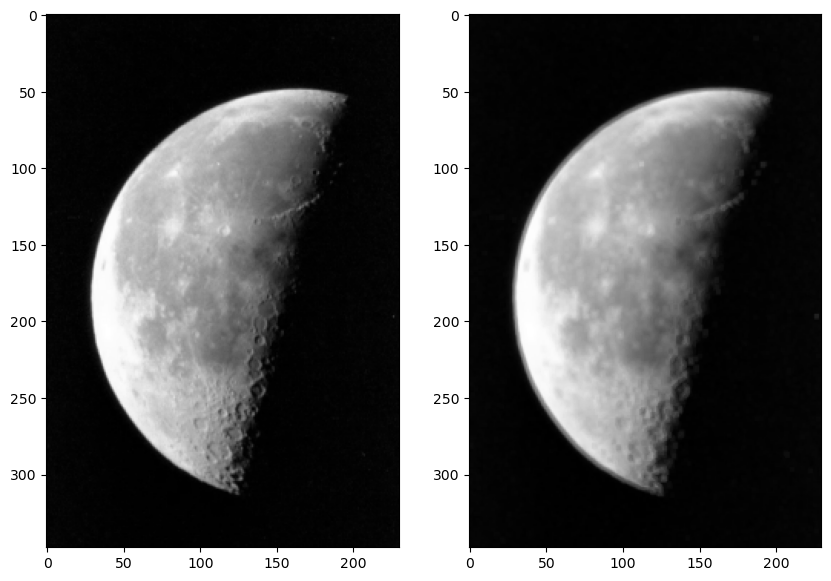

In [65]:
def filter_midpoint(image):
    
    new_image = np.zeros_like(image)
    
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            
            neigh = return_neighborhood(image, i, j)
            
            new_image[i,j] = np.average([np.max(neigh),np.min(neigh)])
            
    return new_image

fig, axs = plt.subplots(1, 2, figsize=(10, 15))

axs[0].imshow(img_gray, cmap='gray')
axs[1].imshow(filter_midpoint(img_gray), cmap='gray')

plt.show()


# Filtro da Mediana

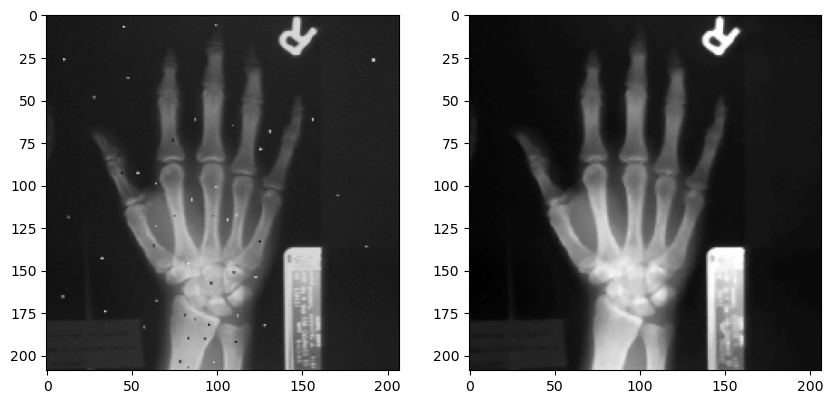

In [66]:
def filter_median(image):
    
    new_image = np.zeros_like(image)
    
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            
            neigh = return_neighborhood(image, i, j)
            
            new_image[i,j] = np.median(neigh)
            
    return new_image


image = cv2.imread("/kaggle/input/median/imagemedian1.png", 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 15))

axs[0].imshow(image, cmap='gray')
axs[1].imshow(filter_median(image), cmap='gray')

plt.show()


# Filtro Bilateral

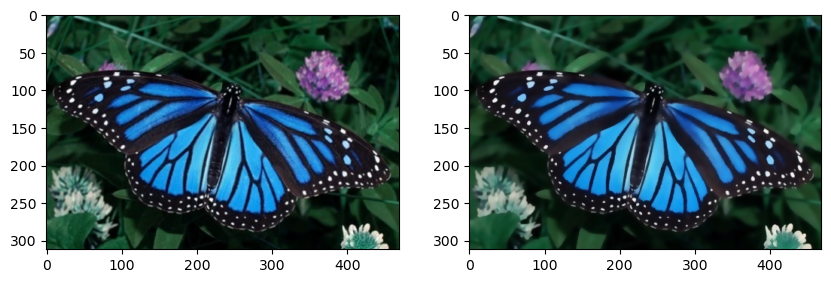

In [67]:

image = cv2.imread("/kaggle/input/butterfly/butterfly.png")

image_bi = cv2.bilateralFilter(image, 9, 75, 75)

fig, axs = plt.subplots(1, 2, figsize=(10, 15))

axs[0].imshow(image, cmap='gray')
axs[1].imshow(image_bi, cmap='gray')

plt.show()